# Lyft Bike Sharing System Data Exploration
### by Karan Bhardwaj

## Preliminary Wrangling

> This document explores a datset that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area between June28, 2017 and October 31,2019.

In [1]:
        # import all packages and set plots to be embedded inline
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import calendar
from math import log


%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
#load the daatset into a pandas dataframe
path = r'C:\Users\kbhardwaj\Downloads\Udacity\DA\Communicate Data Findings' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=None, engine='python')
    li.append(df)

goBike = pd.concat(li, axis=0, ignore_index=True,sort=True)

In [3]:
# high-level overview of data shape and composition
print(goBike.shape)
print(goBike.dtypes)
goBike.head()

(4554806, 17)
bike_id                      int64
bike_share_for_all_trip     object
duration_sec                 int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name            object
end_time                    object
member_birth_year          float64
member_gender               object
rental_access_method        object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name          object
start_time                  object
user_type                   object
dtype: object


,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,NaN,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,NaN,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,Customer
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,Customer
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,NaN,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber


In [4]:
#check duplicate data
goBike_duplicate = goBike[goBike.duplicated()]
goBike_duplicate.head(10)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type


In [5]:
#check datatype of start_time & end_time
print(type(goBike['start_time'][0]))
print(type(goBike['end_time'][0]))

<class 'str'>
<class 'str'>


In [6]:
#change datatype of start_time & end_time column from str to timestamp
goBike['start_time'] =pd.to_datetime(goBike.start_time, format="%Y-%m-%d %H:%M:%S.%f")
print(type(goBike['start_time'][0]))
goBike['end_time'] =pd.to_datetime(goBike.end_time, format="%Y-%m-%d %H:%M:%S.%f")
print(type(goBike['end_time'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [7]:
#create custom fields for in depth analysis
goBike['start_time_hour'] = goBike['start_time'].dt.hour
goBike['start_time_month'] = goBike['start_time'].dt.month
goBike['start_time_month'] = goBike['start_time_month'].apply(lambda x: calendar.month_abbr[x])
goBike['start_time_year'] = goBike['start_time'].dt.year
goBike['start_time_weekday'] = goBike['start_time'].dt.weekday_name
goBike.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,start_time_hour,start_time_month,start_time_year,start_time_weekday
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.245,1987.0,Male,...,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.654,Customer,16,Dec,2017,Sunday
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.617,1965.0,Female,...,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.842,Customer,15,Dec,2017,Sunday
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.883,NaN,NaN,...,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.411,Customer,22,Dec,2017,Sunday
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.531,NaN,NaN,...,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.636,Customer,17,Dec,2017,Sunday
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.571,1997.0,Female,...,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.001,Subscriber,14,Dec,2017,Sunday


In [8]:
goBike['start_time_year'] = goBike['start_time_year'].astype(str)

In [9]:
# convert start_time_month and start_time_weekday into ordered categorical types
ordinal_var_dict = {'start_time_month': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                    'start_time_weekday': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
                   'start_time_year':['2017','2018','2019']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    goBike[var] = goBike[var].astype(ordered_var)

### Structure of your dataset: -

> This is data of 4554806 rides of Ford GoBike System data starting from June 2017 until October 2019. Most variables are categorical except the duration_sec which is duartion of each ride in seconds. We also have two timestamp variables of when the ride start i.e. start_time and end_time i.e. when the ride ended. </br>
I have created following fields to analyse dataset in more depth: - 
   - start_time_hour :- Hour of start time of the ride
   - start_time_month :- Month of start time of the ride
   - start_time_year :- Year of start time of the ride
   - start_time_weekday :- Weekday of start time of the ride

### Main features of interest in your dataset?

> I am interested in following points:- 
 - Ride duration spread of the dataset.
 - Avg Ride Duration of a trip. 
 - When are most trips taken in terms of time of day, day of the week, or month of the year?
 - Does above are impacted by User Type i.e. user being a subscriver or a customer. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect start_time_hour, start_time_month, start_time_weekday, duration_sec, and UserType are the variables that help with my investigation.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: duration_sec.

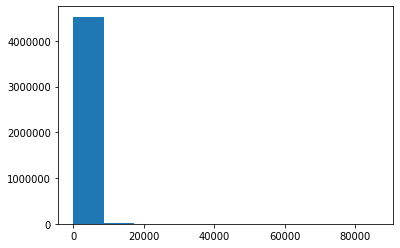

In [10]:
# start with a standard-scaled plot
plt.hist(data=goBike, x = 'duration_sec');

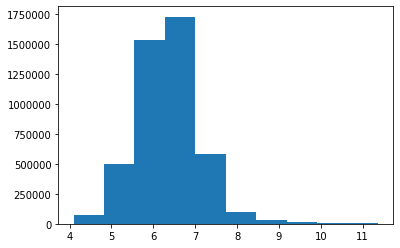

In [11]:
# there's a long tail in the distribution, so let's put it on a log scale instead
goBike['log_duration_sec'] = goBike['duration_sec'].apply(log)
plt.hist(data = goBike, x = 'log_duration_sec');

In [12]:
np.log10(goBike['duration_sec'].astype(np.int64).describe())

count    6.658470
mean     2.935497
std      3.365374
min      1.778151
25%      2.553883
50%      2.753583
75%      2.947434
max      4.936358
Name: duration_sec, dtype: float64

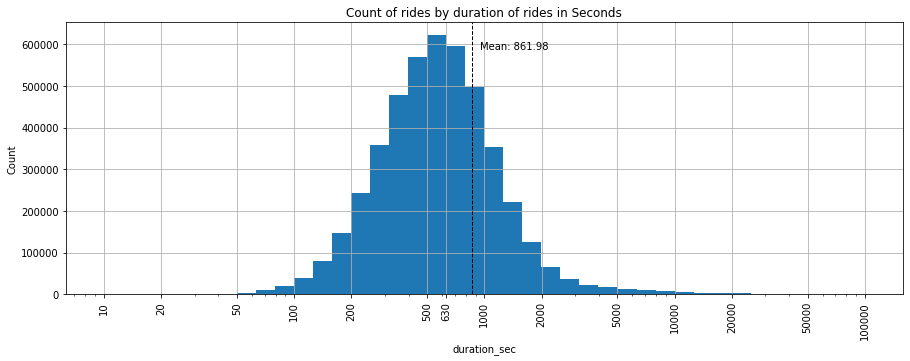

In [13]:
# refining the plot with proper axis and adding mean
plt.figure(figsize = [15, 5])
bin_edges = 10 ** np.arange(1, 5+.1,.1)
plt.hist(goBike['duration_sec'], bins = bin_edges);
plt.xscale('log');
tick_locs = [10,20,50,100,200,500,630,1000,2000,5000,10000,20000,50000, 100000];
plt.xticks(tick_locs, tick_locs);
plt.xticks(rotation=90);
plt.title('Count of rides by duration of rides in Seconds')
plt.xlabel('duration_sec');
plt.ylabel('Count');
plt.grid(True)
plt.axvline(goBike['duration_sec'].mean(), color='k', linestyle='dashed', linewidth=1);
min_ylim, max_ylim = plt.ylim()
plt.text(goBike['duration_sec'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(goBike['duration_sec'].mean()));

From above, we can conclude that the Avg durtaion of ride is of 861 Seconds and number of rides peak around 500-630 seconds. 

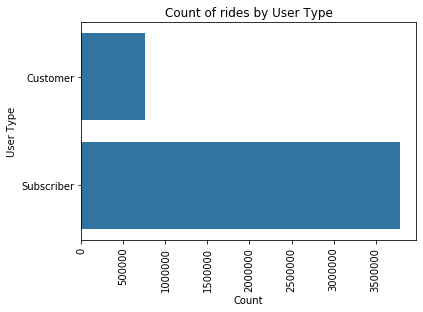

In [14]:
# plot for User Type
default_color = sb.color_palette()[0]
sb.countplot(data = goBike, y = 'user_type', color = default_color);
plt.xticks(rotation=90)
plt.title('Count of rides by User Type')
plt.xlabel('Count');
plt.ylabel('User Type');

Points observed:- 
- Majority of rides are by user type Subscribers. 

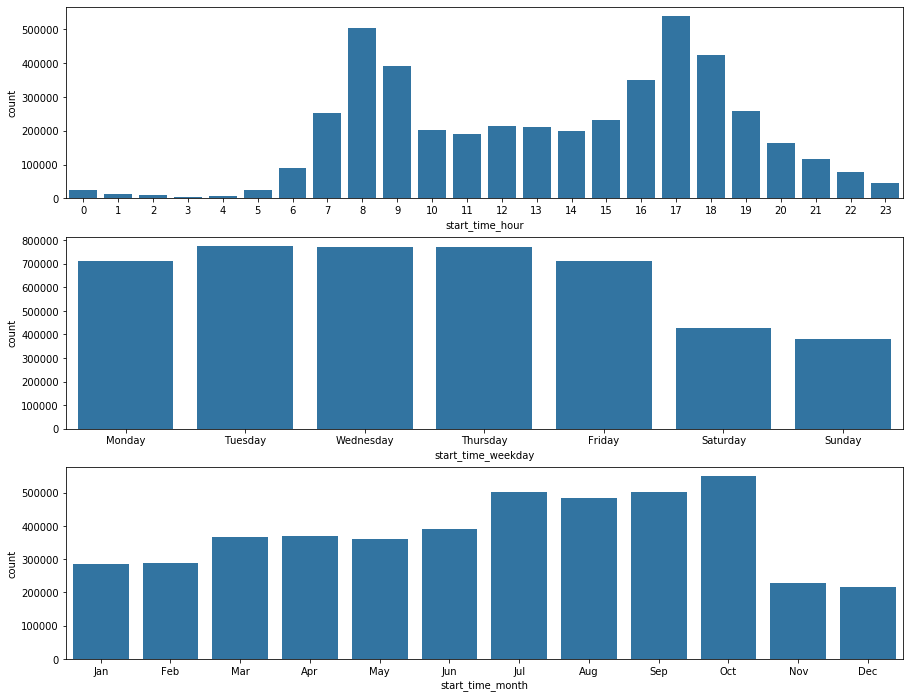

In [15]:
#plotting the count of rides by hour of day, day of the week, and month of the year
fig, ax = plt.subplots(nrows=3, figsize = [15,12])
default_color = sb.color_palette()[0]
sb.countplot(data = goBike, x = 'start_time_hour', color = default_color, ax = ax[0])
sb.countplot(data = goBike, x = 'start_time_weekday', color = default_color, ax = ax[1])
sb.countplot(data = goBike, x = 'start_time_month', color = default_color, ax = ax[2])
plt.show()

Points observed:- 
- Majority of rides peak around start and end of typical workday start and end time i.e. 8AM-9AM and 5PM-6PM. 
- Majority of rides are during the weekdays in comparison to weekends where visually there is a drop in rides. 
- Majority of rides are in month of October but rides dip in November in comparison with October.<br />

Would be interesting to see if above changes based on UserType and year.

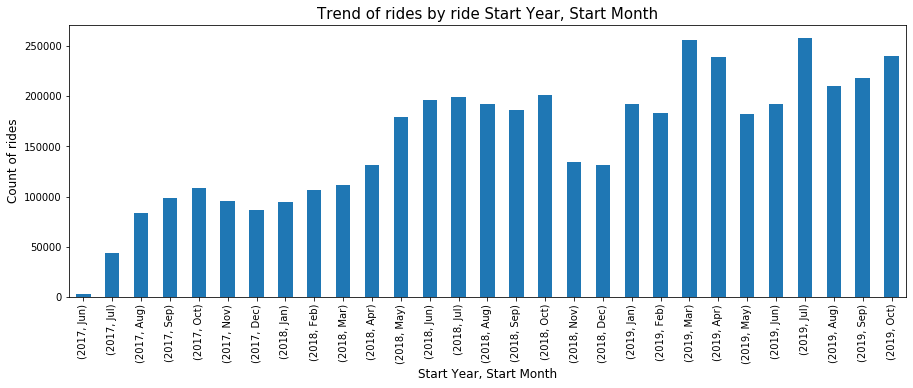

In [16]:
goBike_groupedBy_month = goBike.groupby(['start_time_year','start_time_month']).size()
goBike_groupedBy_month.plot(kind='bar',figsize=[15,5]);
plt.title('Trend of rides by ride Start Year, Start Month',fontsize=15);
plt.ylabel('Count of rides',fontsize=12);
plt.xlabel('Start Year, Start Month',fontsize=12);

We can presume that there is a dip in number of rides from October to November as seen for years 2017 & 2018 above. Would be interesting to investigate if same hold true based on different UserTypes.

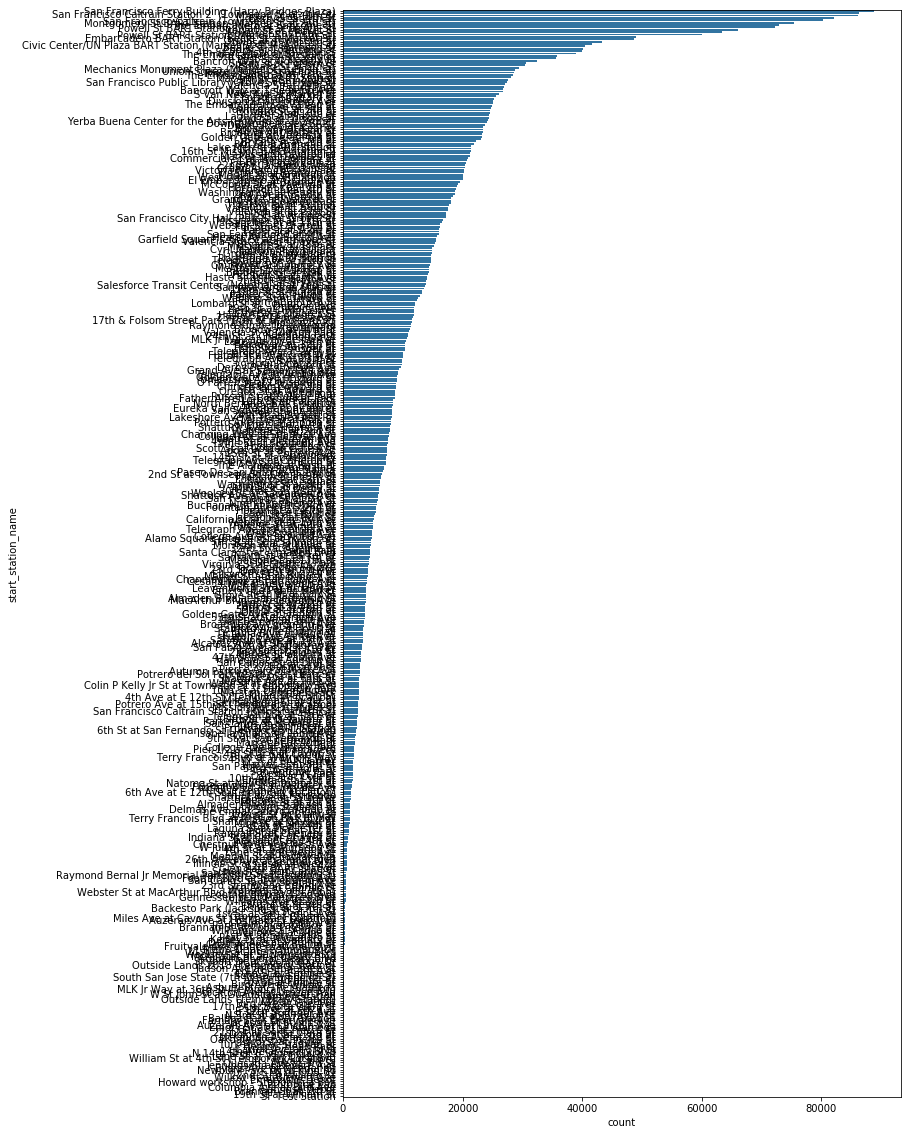

In [17]:
# let's plot StartStation & EndStationName to get an idea of each categorical variable's distribution.
base_color = sb.color_palette()[0]
cat_order = goBike['start_station_name'].value_counts().index
plt.figure(figsize = [10,20]);
sb.countplot(data = goBike, y = 'start_station_name', color = base_color, order = cat_order);

As we have 400+ unique Start and End station types, I'll plot the top 20 and bottom 20 stations of each type. 

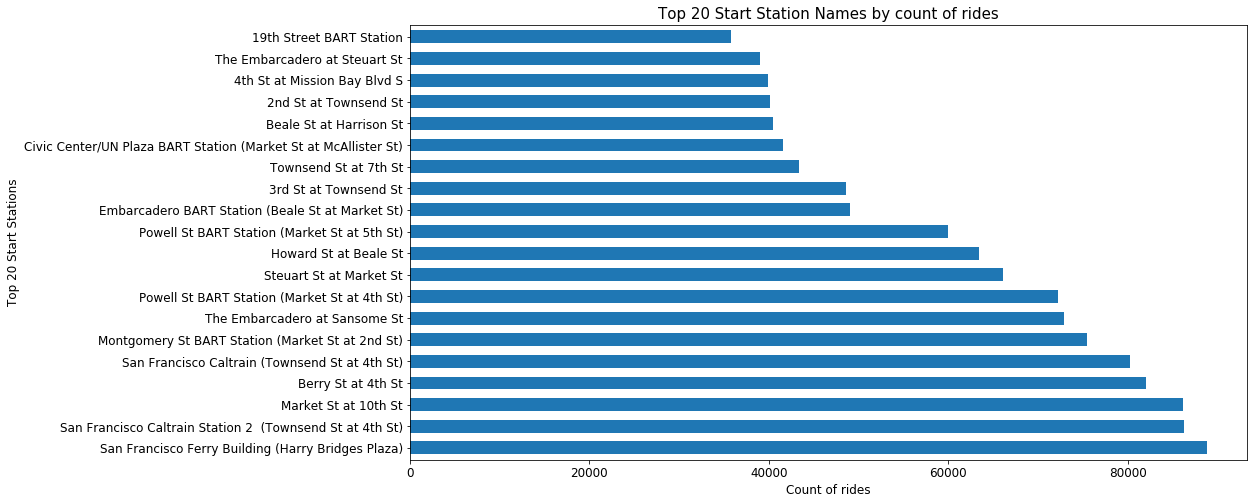

In [18]:
# Plotting Top 20 start_station_name
goBike.start_station_name.value_counts()[:20].plot(kind= "barh", figsize=(15,8), fontsize=12, width=.6);
plt.title('Top 20 Start Station Names by count of rides',fontsize=15);
plt.ylabel('Top 20 Start Stations',fontsize=12);
plt.xlabel('Count of rides',fontsize=12);

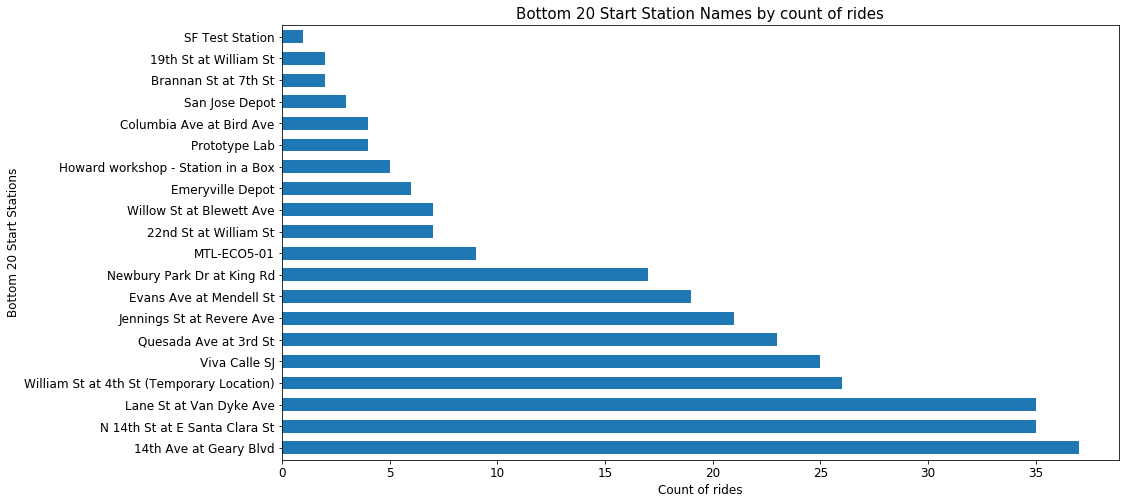

In [19]:
# Plotting Bottom 20 start_station_name by count of rides
goBike.start_station_name.value_counts()[-20:].plot(kind= "barh", figsize=(15,8), fontsize=12, width=.6);
plt.title('Bottom 20 Start Station Names by count of rides',fontsize=15);
plt.ylabel('Bottom 20 Start Stations',fontsize=12);
plt.xlabel('Count of rides',fontsize=12);

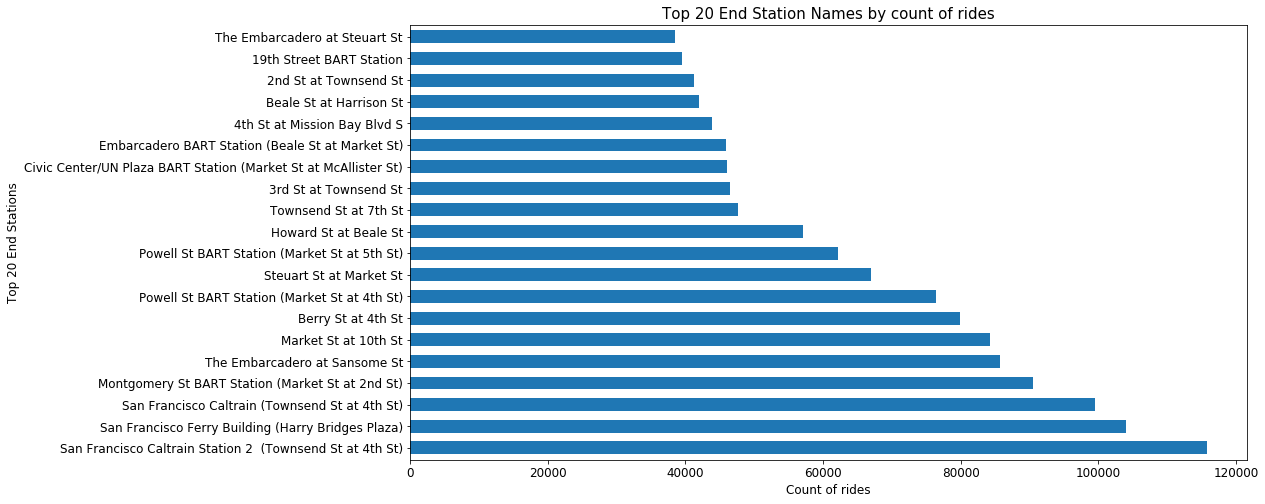

In [20]:
# Plotting Top 20 end_station_name by count of rides
goBike.end_station_name.value_counts()[:20].plot(kind= "barh", figsize=(15,8), fontsize=12, width=.6);
plt.title('Top 20 End Station Names by count of rides',fontsize=15)
plt.ylabel('Top 20 End Stations',fontsize=12);
plt.xlabel('Count of rides',fontsize=12);

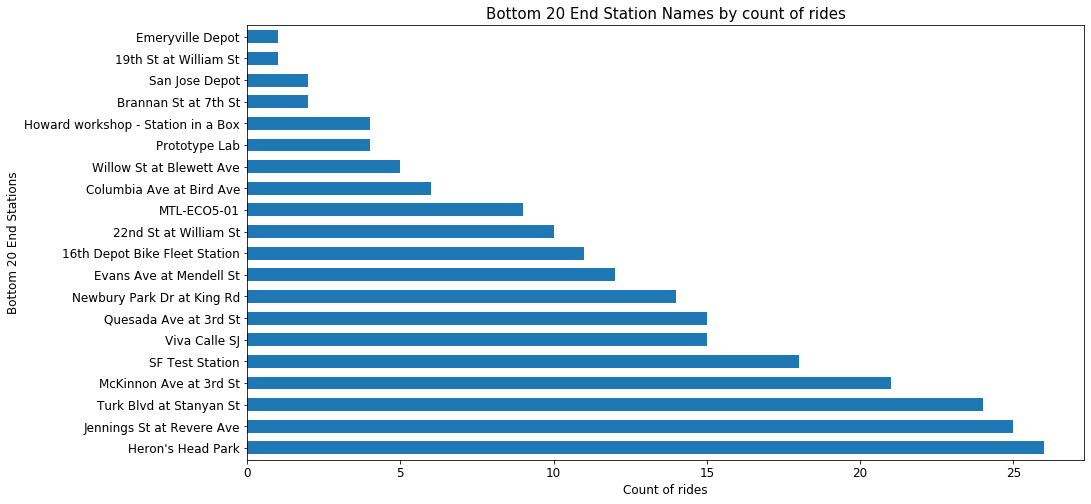

In [21]:
# Plotting Bottom 20 end_station_name by count of rides
goBike.end_station_name.value_counts()[-20:].plot(kind= "barh", figsize=(15,8), fontsize=12, width=.6);
plt.title('Bottom 20 End Station Names by count of rides',fontsize=15);
plt.ylabel('Bottom 20 End Stations',fontsize=12);
plt.xlabel('Count of rides',fontsize=12);

As we have 400+ start and end stations won't be using them further to analyze data based on a predefined bias of top/bottom 20 start/end stations.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration_sec variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked unimodal, with one peak between 500 and 650 seconds.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There is unusual distribution among the duration_sec variable but there can be users who used the bike ride for longer duration. So didn't exclude the data. 

## Bivariate Exploration

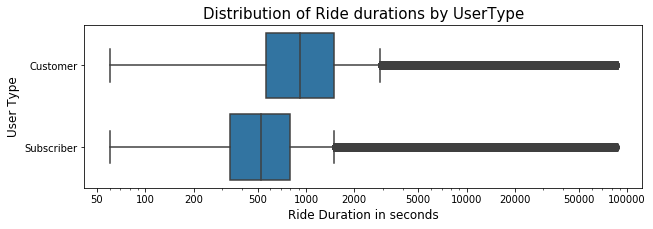

In [22]:
plt.figure(figsize=[10,3])
base_color = sb.color_palette()[0]
sb.boxplot(data = goBike, y = 'user_type', x = 'duration_sec', color = base_color);
plt.xscale('log');
tick_locs = [50,100,200,500,1000,2000,5000,10000,20000,50000,100000];
plt.xticks(tick_locs, tick_locs);
plt.title('Distribution of Ride durations by UserType',fontsize=15)
plt.xlabel('Ride Duration in seconds',fontsize=12);
plt.ylabel('User Type',fontsize=12);

Ride duration distribution is significantly different from the number of rides by User Type.</br>
- Previously above we have seen that number of rides are mostly by Subscriber user type but the ride duration distribution shows Customer user types use bike for longer durations. 

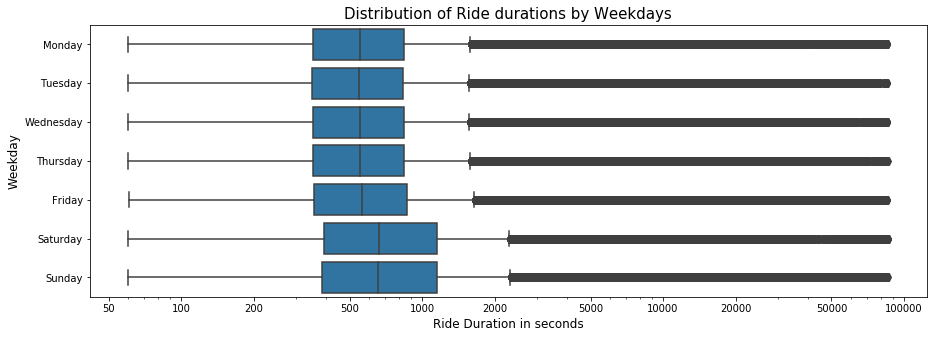

In [23]:
plt.figure(figsize=[15,5])
base_color = sb.color_palette()[0]
sb.boxplot(data = goBike, y = 'start_time_weekday', x = 'duration_sec', color = base_color);
plt.xscale('log');
tick_locs = [50,100,200,500,1000,2000,5000,10000,20000,50000,100000];
plt.xticks(tick_locs, tick_locs);
plt.title('Distribution of Ride durations by Weekdays',fontsize=15)
plt.xlabel('Ride Duration in seconds',fontsize=12);
plt.ylabel('Weekday',fontsize=12);

Number of rides were lower during weekends in comparison with weekdays but the ride duration distribution over weekend is more over weekend. </br>
Would investigate further if above changes based on User Type.

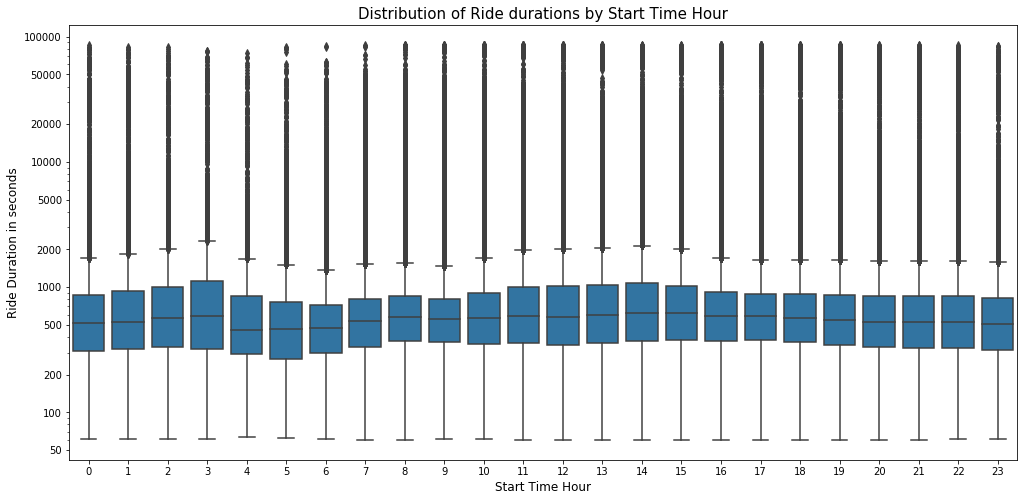

In [24]:
plt.figure(figsize=[17,8])
base_color = sb.color_palette()[0]
sb.boxplot(data = goBike, x = 'start_time_hour', y = 'duration_sec', color = base_color);
plt.yscale('log');
tick_locs = [50,100,200,500,1000,2000,5000,10000,20000,50000,100000];
plt.yticks(tick_locs, tick_locs);
plt.title('Distribution of Ride durations by Start Time Hour',fontsize=15)
plt.ylabel('Ride Duration in seconds',fontsize=12);
plt.xlabel('Start Time Hour',fontsize=12);

Ride Duration median fluctuates around 500 seconds +/-100 seconds throughout the day in stark comparison with count of rides as previously seen above in univariate exploration which flucatated quite significantly based on time of the day.

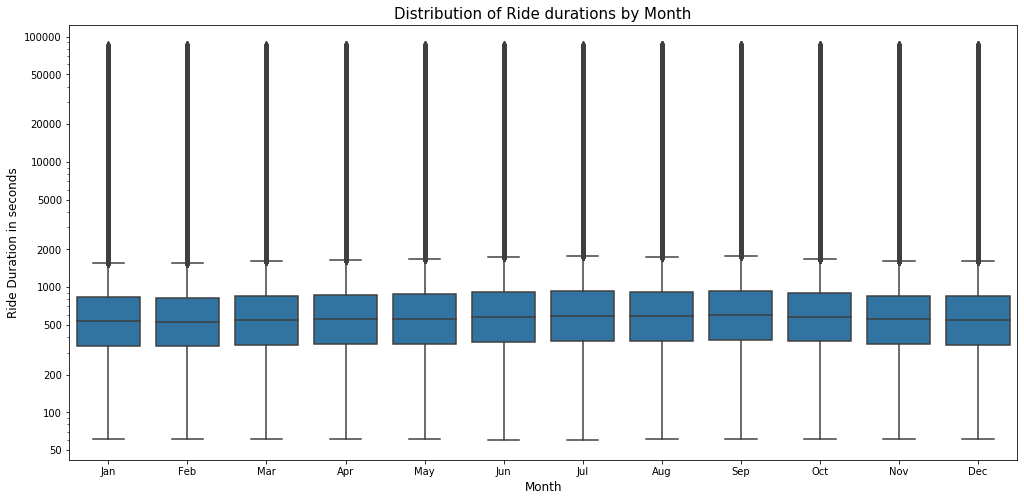

In [25]:
plt.figure(figsize=[17,8])
base_color = sb.color_palette()[0]
sb.boxplot(data = goBike, x = 'start_time_month', y = 'duration_sec', color = base_color);
plt.yscale('log');
tick_locs = [50,100,200,500,1000,2000,5000,10000,20000,50000,100000];
plt.yticks(tick_locs, tick_locs);
plt.title('Distribution of Ride durations by Month',fontsize=15)
plt.ylabel('Ride Duration in seconds',fontsize=12);
plt.xlabel('Month',fontsize=12);

Ride Duration distribution remains stangnant throughout the months and don't change much in comparison with number of rides which take dip in month of November and December. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  
- Ride duration distribution by user type in Bivariate exploration gave an opposite pattern in comparison with univariate exploration of count of rides by User Type. While, during the univariate exploration the count of rides were mostly by Subscriber user type but during the Bivariate exploration of ride duration distribution of by user type customer user type rent bikes for longer duration in comparison with subscriber user type. </br>
- Count of rides by start_time_weekday were significantly low for the weekend but the ride duration distribution is higher over weekends in comparison with weekdays. 
- Count of rides by start_time_month changed over the months but the ride duration distribution over month seems mostly same.
- Count of rides by start_time_hour fluctuated signifcantly based on time/hour of the day but the median ride duration doesn't change as significantly as count of rides.ration which flucatated quite significantly based on time of the day. 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Based on above contrasting relation between count of rides and distribution of duration of rides based on day of week will explore further based on user type. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

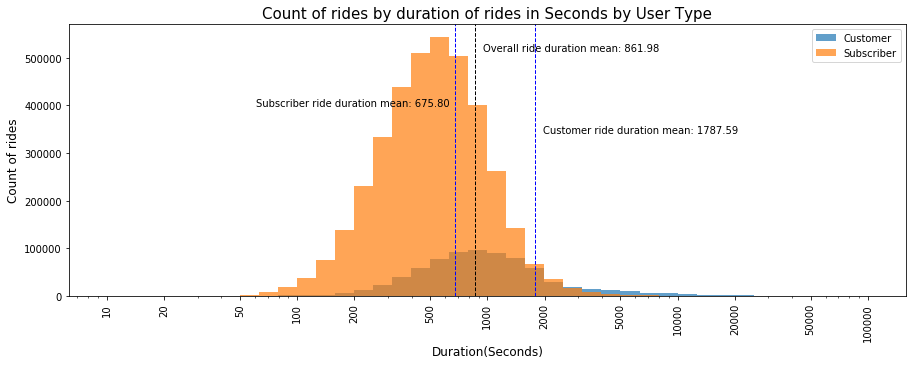

In [26]:
goBike_groupedBy_UserType = goBike.groupby('user_type').duration_sec
bin_edges = 10 ** np.arange(1, 5+.1,.1)
goBike_groupedBy_UserType.plot(kind='hist',figsize=[15,5],alpha=.7,legend=True,bins = bin_edges);
plt.xscale('log');
tick_locs = [10,20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000];
plt.xticks(tick_locs, tick_locs);
plt.xticks(rotation=90);
plt.title('Count of rides by duration of rides in Seconds by User Type',fontsize=15)
plt.xlabel('Duration(Seconds)',fontsize=12);
plt.ylabel('Count of rides',fontsize=12);
#plt.grid(True)
plt.axvline(goBike[goBike['user_type']=='Customer'].duration_sec.mean(), color='b', linestyle='dashed', linewidth=1);
min_ylim, max_ylim = plt.ylim()
plt.text(goBike[goBike['user_type']=='Customer'].duration_sec.mean()*1.1, max_ylim*0.6, 'Customer ride duration mean: {:.2f}'.format(goBike[goBike['user_type']=='Customer'].duration_sec.mean()));
plt.axvline(goBike[goBike['user_type']=='Subscriber'].duration_sec.mean(), color='b', linestyle='dashed', linewidth=1);
plt.text(goBike[goBike['user_type']=='Subscriber'].duration_sec.mean()*.09, max_ylim*0.7, 'Subscriber ride duration mean: {:.2f}'.format(goBike[goBike['user_type']=='Subscriber'].duration_sec.mean()));
plt.axvline(goBike['duration_sec'].mean(), color='k', linestyle='dashed', linewidth=1);
plt.text(goBike['duration_sec'].mean()*1.1, max_ylim*0.9, 'Overall ride duration mean: {:.2f}'.format(goBike['duration_sec'].mean()));

From above we can conclude:- 
- __User Type__ impacts avg ride durtation. 
- Overall avg ride duration: - 861 seconds.
- Subscriber avg ride duration: - 675 seconds.
- Customer avg ride duration: - 1787 second.
- Subscriber user types avg rides are approx 3 times shorter in comparison with Customer user types. 

In [27]:
#fig, ax = plt.subplots(nrows=3, figsize = [20,12])
#sb.countplot(data = goBike, x = 'start_time_hour',  ax = ax[0],hue="user_type")
#sb.countplot(data = goBike, x = 'start_time_weekday', ax = ax[1],hue="user_type")
#sb.countplot(data = goBike, x = 'start_time_month',  ax = ax[2],hue="user_type")
#plt.show()

C:\Users\kbhardwaj\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


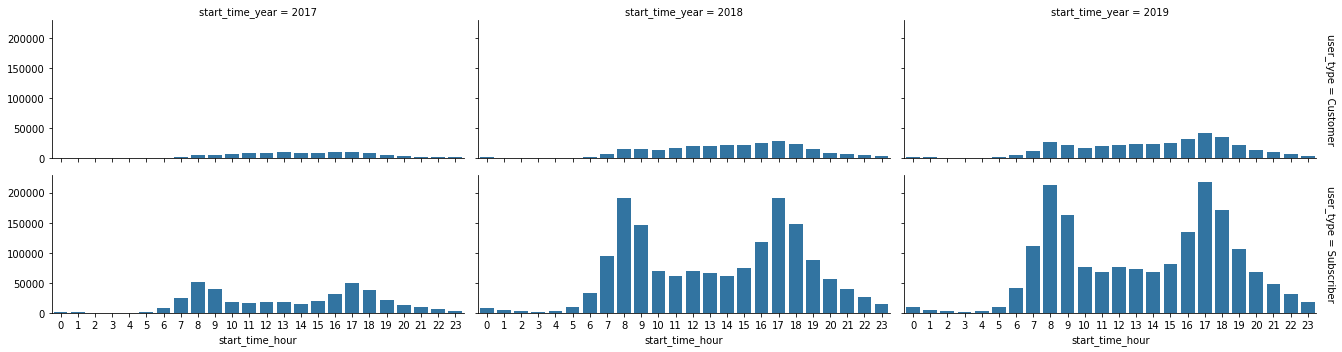

In [28]:
g = sb.FacetGrid(data = goBike, row = 'user_type',col='start_time_year',height=2.5,aspect=2.5, margin_titles = True);
g.map(sb.countplot,'start_time_hour');

Majority of rides **still** peak around start and end of typical workday start and end time i.e. 8AM-9AM and 5PM-6PM for both Subscriber and Customer User Type but interestingly there is a peak in rides at 11AM for customers in contrast with a dip for subsribers at same time.

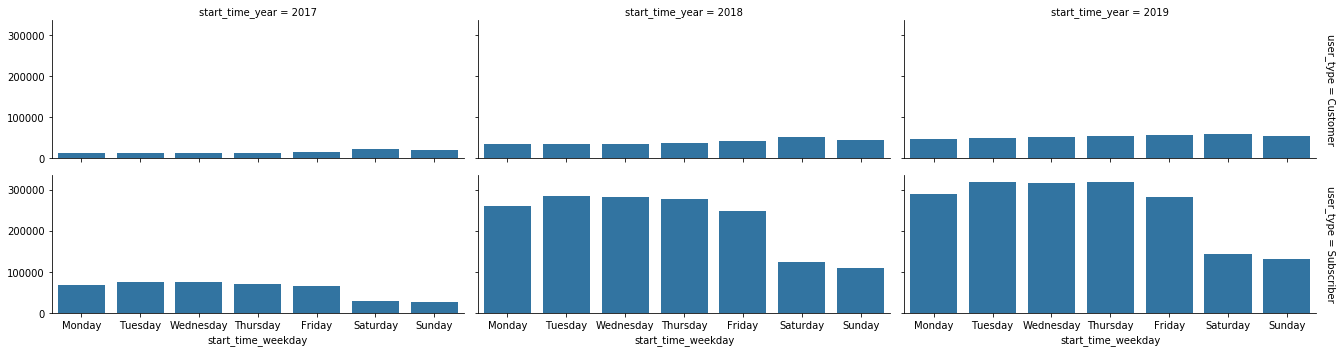

In [29]:
g = sb.FacetGrid(data = goBike, row = 'user_type',col='start_time_year',height=2.5,aspect=2.5, margin_titles = True);
g.map(sb.countplot,'start_time_weekday');

For Subscriber user type majority of rides are **still** during the weekdays in comparison to weekends where visually there is a drop in rides but in case of customer user type in contrast with subscribers they peak over the weekends in comparison with weekdays.

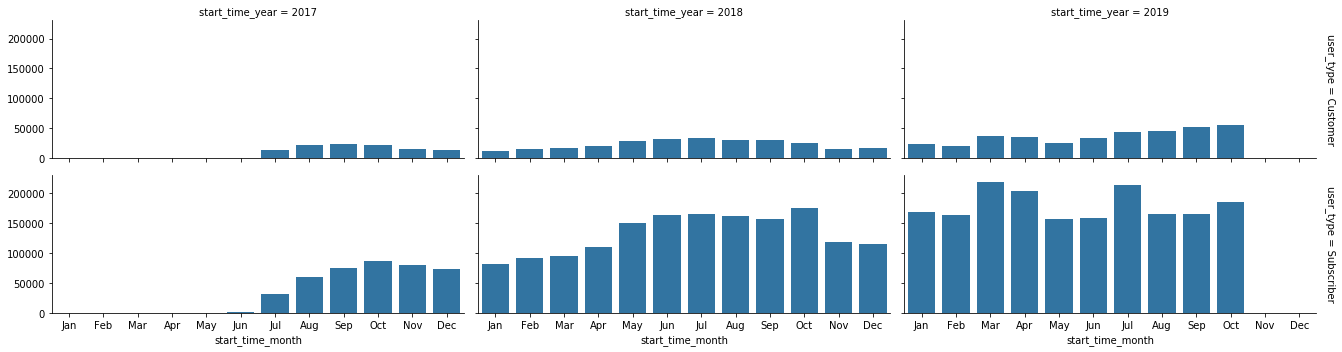

In [30]:
g = sb.FacetGrid(data = goBike, row = 'user_type',col='start_time_year',height=2.5,aspect=2.5, margin_titles = True);
g.map(sb.countplot,'start_time_month');

Based on user type there is no month with clear majority in terms of rides across the years which breaks previous notion of October being the month with most rides. Won't investigate further. 

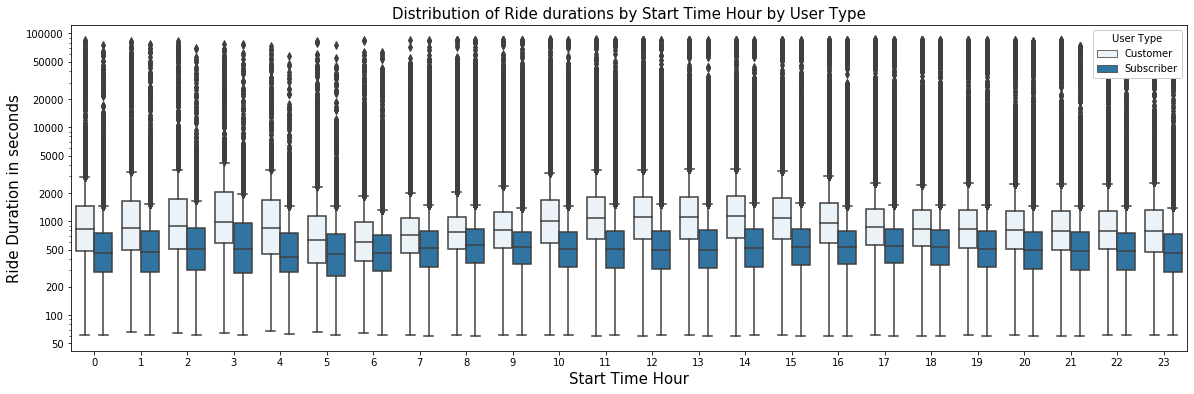

In [31]:
plt.figure(figsize=[20,6])
base_color = sb.color_palette()[0]
ax=sb.boxplot(data = goBike, x = 'start_time_hour', y = 'duration_sec', color = base_color, hue='user_type');
plt.yscale('log');
tick_locs = [50,100,200,500,1000,2000,5000,10000,20000,50000, 100000];
plt.yticks(tick_locs, tick_locs);
ax.legend(loc = 1, ncol = 1, framealpha = 1, title="User Type");
plt.title('Distribution of Ride durations by Start Time Hour by User Type',fontsize=15)
plt.ylabel('Ride Duration in seconds',fontsize=15);
plt.xlabel('Start Time Hour',fontsize=15);

As noted above the significant difference in ride duration pattern for customers and subsribers hold true when broken up by time of the day and is consistent with cumulative finding that customer trips are longer in comparison with subscribers.

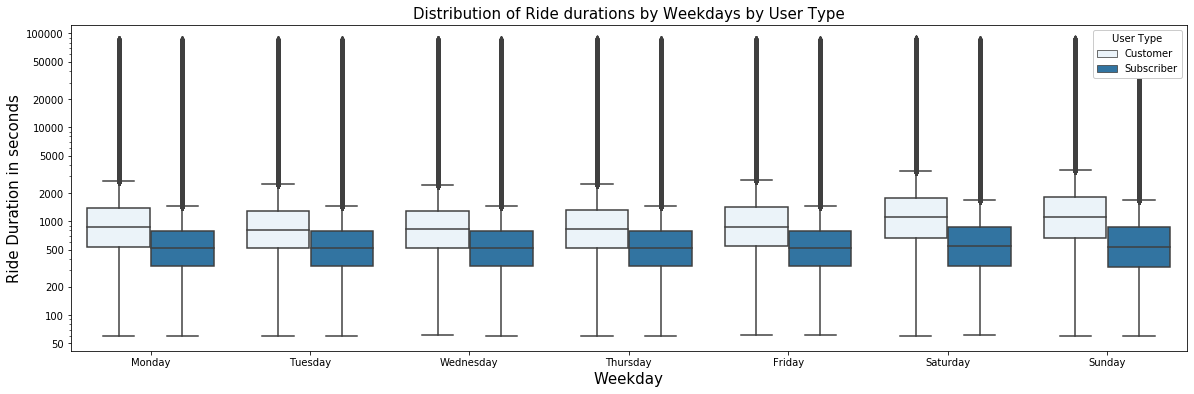

In [32]:
plt.figure(figsize=[20,6])
base_color = sb.color_palette()[0]
ax=sb.boxplot(data = goBike, x = 'start_time_weekday', y = 'duration_sec', color = base_color, hue='user_type');
plt.yscale('log');
tick_locs = [50,100,200,500,1000,2000,5000,10000,20000,50000, 100000];
plt.yticks(tick_locs, tick_locs);
ax.legend(loc = 1, ncol = 1, framealpha = 1, title="User Type");
plt.title('Distribution of Ride durations by Weekdays by User Type',fontsize=15)
plt.ylabel('Ride Duration in seconds',fontsize=15);
plt.xlabel('Weekday',fontsize=15);

As noted above the significant difference in ride duration pattern for customers and subsribers hold true when broken up by day of the week and is consistent with cumulative finding that customer trips are longer in comparison with subscribers.

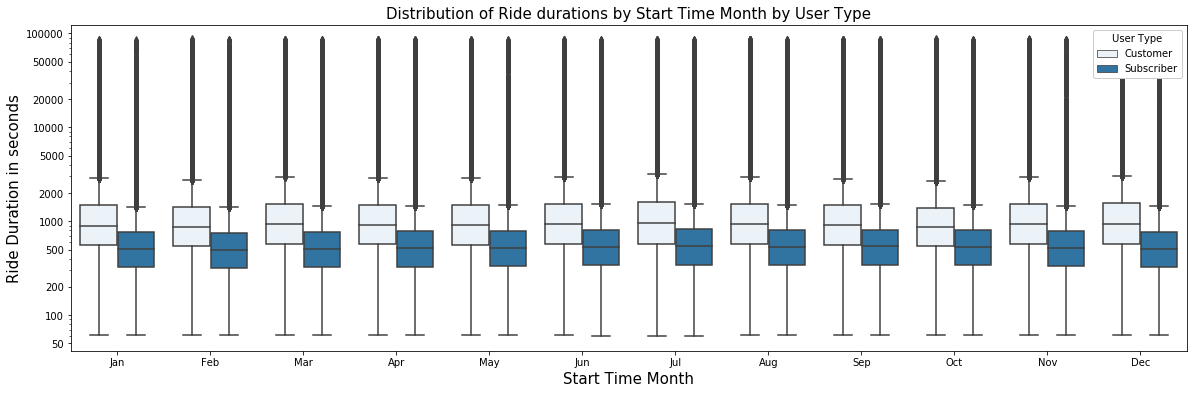

In [33]:
plt.figure(figsize=[20,6])
base_color = sb.color_palette()[0]
ax=sb.boxplot(data = goBike, x = 'start_time_month', y = 'duration_sec', color = base_color, hue='user_type');
plt.yscale('log');
tick_locs = [50,100,200,500,1000,2000,5000,10000,20000,50000, 100000];
plt.yticks(tick_locs, tick_locs);
ax.legend(loc = 1, ncol = 1, framealpha = 1, title="User Type");
plt.title('Distribution of Ride durations by Start Time Month by User Type',fontsize=15)
plt.ylabel('Ride Duration in seconds',fontsize=15);
plt.xlabel('Start Time Month',fontsize=15);

As noted above the significant difference in ride duration pattern for customers and subsribers hold true when broken up by month of the year and is consistent with cumulative finding that customer trips are longer in comparison with subscribers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Trip duration for cutomers is significantly more in compatison with subscribers is confirmed after looking at similar patterns after looking at the data by when the trips taken in terms of time of day, day of the week, or month of the year.

### Were there any interesting or surprising interactions between features?

> As previously seen in univariate exploration that October is the month with highest number of trips turned out to be bias as we have partial data starting from June of 2017. 